<a id='Back to top'></a>

# <font color='steelblue'> Predicting Elderly Out-of-pocket Expenditures for Health Care in the United States   </font>

| Name | SNR  |
|------|------|
| Emilie Bartels  | 2028466|
| Larissa Heshusius  | 807104 |

***

## Table of contents

<a href='#Preperations'>Preparations</a>

<a href='#Research Question'>Introduction</a>

<a href='#Motivation'>Motivation</a>

<a href='#Data'>Data</a> 

<a href='#Methodology'>Methodology</a>

<a href='#Preparing the data'>Preparing the data</a>

<a href='#Results'>Results</a> 

- <a href='#Descriptive Statistics'>Descriptive Statistics</a> 

- <a href='#Linear Regression Model'>Multivariate Linear Regression</a> 

- <a href='#Lasso Regression'>Lasso Regression</a> 
    
- <a href='#Random Forest Model'>Random Forest</a> 

<a href='#Discussion'>Discussion</a>

<a href='#Conclusion'>Conclusion</a>



***

<a id='Preperations'></a>

## Preparations

In [9]:
%%bash
pip install --user plotly

You are using pip version 9.0.1, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [10]:
import plotly.tools as tls
import plotly.plotly as py
import plotly.graph_objs as go
import plotly

In [11]:
# Signing in to plotly
py.sign_in('larissssx', 'Do9x3BGXFcDZImSTVwDa')

In [3]:
# Importing the relevant libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import YouTubeVideo
import sklearn as sk
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from scipy.stats import pearsonr
from statistics import stdev, mean
from IPython.display import Image
import scipy
from scipy.cluster import hierarchy as hc
from pandas import Series, DataFrame
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
import math

# Hiding annoying warnings
import warnings
warnings.filterwarnings('ignore')

# Allowing plots to appear within the notebook
%matplotlib inline

# Setting the number of decimals to zero
pd.set_option('float_format', '{:.0f}'.format)

In [4]:
# Showing a list of available styles for the notebook
print(plt.style.available)

['seaborn-colorblind', 'seaborn-ticks', 'classic', 'seaborn-bright', 'grayscale', 'seaborn-talk', 'seaborn-muted', 'seaborn-darkgrid', 'seaborn-dark-palette', 'seaborn-pastel', 'seaborn', 'seaborn-white', 'seaborn-whitegrid', 'seaborn-dark', 'seaborn-poster', 'seaborn-notebook', 'seaborn-deep', 'seaborn-paper', 'fivethirtyeight', 'bmh', 'ggplot', 'dark_background']


In [5]:
# Choosing the 'seaborn-muted' style
plt.style.use('seaborn-muted')

***

<a id='Research Question'></a>

## Introduction

This research is focused on the out of the pocket health care costs of elderly in the US, based on data of 2014. We will use different machine learning techniques like multivariate linear regresion, LASSO regression and random forest regression to investigate the development of out-of pocket health care costs. To optimally analyze the data, we first prepare the data and look at some descriptive statistics to understand the data. We completely conduct our own research which differ from other researches that has been executed on the HRS dataset. We will evaluate the outcomes of our research to answer the following questions:
* ***How will the out-of pocket health care costs of elderly in the US develop for individuals according to machine learning techniques?***

* Which personal characteristics significantly influence these health care costs?
* Which model predicts the out of pocket medical expenditures of eldery best?

*needs to be finalized*  Larissa

***

<a id='Motivation'></a>

## Motivation

***Development health care costs***

Health care is an important topic in countries all over the world since all people are affected by it and it accounts for a large part of the government expenditures. The costs significantly differ between people but everyone gets in touch with it. Total health care expenditures are increasing every year, which is not always completely covered by the government. In the paper <a href='https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5977561/'>Supervised Learning Methods for Predicting Healthcare Costs </a> they mention the national health expenditure grew with 5.8% to 3,2 trillion dollar in 2015. This comes down to $9,900 per person which accounted for approximately 17.8% of the nation’s GDP.    

Since the trend of rising health care costs will keep developing the upcoming years, it is important to control these unsustainable increases. To partially solve this, the future costs could be predicted to efficiently target care management for individuals at the highest risk of incurring these costs. One of these “sensitive” groups are the older, retired people. Since life expectancy of people rise, this group is an important cause for the increasing health care costs. These costs can be one of the biggest expenses for this group and the costs keep growing. Therefore, this research is focused on people with an age of 70+ since a lot of information could be gained here.  

***Individual medical expenditures***

Cost prediction is not only important for health insurers, but also for the patients. The dependent variable in this research is out of pocket medical expenditures which are the costs for the individuals.  It is beneficial for them to know their likely expenditures in advance to optimally choose their insurance plan with the right deductibles and premiums. 
In this research, we investigate which demographic and personal characteristics affect the out of pocket health care costs for individuals. For example, previous <a href='https://www.healthsystemtracker.org/chart-collection/health-expenditures-vary-across-population/#item-health-spending-increases-throughout-adulthood-men-women-spending-varies-age_2015'>research </a> has shown  that gender and race affect out of pocket expenditures. Some of these characteristics could be affected by the individuals, like smoking and alcohol consumption. When people know the effect of these factors, this could result in important policy implications.

***Assumptions***

-Do not take into account policy changes
A primary disadvantage of random forests is that the results are not easily interpretable: that is, if you would like to draw conclusions about the meaning of the classification model, random forests may not be the best choice.
-

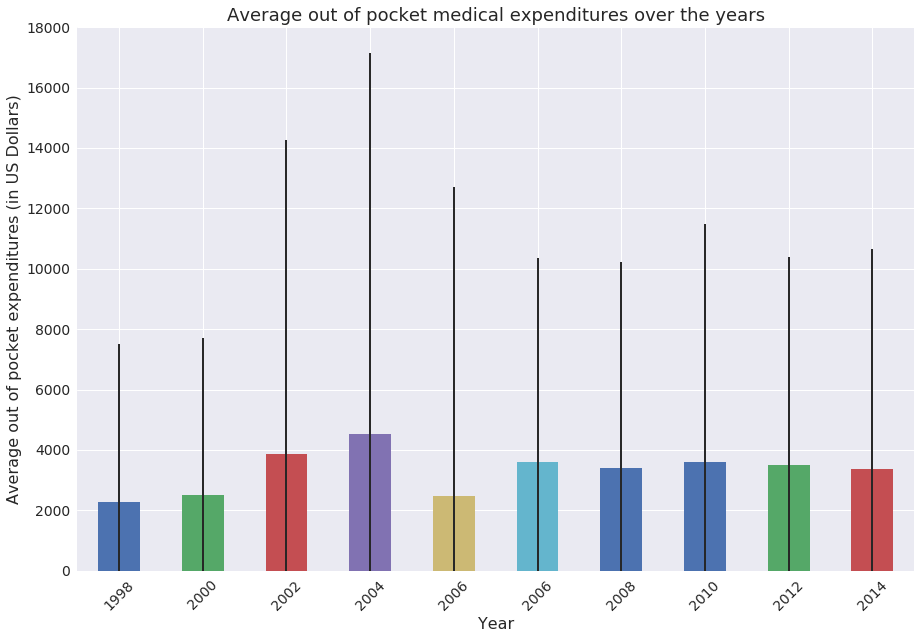

In [4]:
# Importing the data
dataframe2 = pd.read_stata('Data/Dataset wave3-12.dta')

# Creating a Pandas Dataframe
df2 = pd.DataFrame(dataframe2)

# Renaming the columns
df2.rename(columns=
          {'r10oopmd': '2010',
           'r11oopmd' : '2012',
           'r12oopmd' : '2014',
           'r3oopmd' : '2006',
           'r4oopmd' : '1998',
           'r5oopmd' : '2000',
           'r6oopmd' : '2002',
           'r7oopmd' : '2004',
           'r8oopmd' : '2006',
           'r9oopmd' : '2008'
          }, inplace=True) # the column is renamed in place

# Changing the order of columns
cols = list(df2.columns.values)
df2 = df2[['1998', '2000', '2002', '2004', '2006', \
         '2008', '2010', '2012', '2014']]

# Handling missing data
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(df2)
df2 = pd.DataFrame(data=imp.transform(df2) , columns=df2.columns)

# Visualizing the mean and standard deviation of out of pocket expenditures over the years
means = np.mean(df2)
std = np.std(df2)
p = means.plot(figsize=(15,10), legend=False,kind="bar",rot=45,fontsize=14,yerr=std)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Average out of pocket expenditures (in US Dollars)', fontsize=16)
plt.title('Average out of pocket medical expenditures over the years', fontsize=18)
plt.ylim(0, 18000)
plt.show()

This bar chart shows that the average out of pocket medical expenditures of elderly in the United States peaked in 2004, decreased in 2006 and have increased ever since. The peak in 2004 can probably be explained by outliers, as the standard deviation is relatively high as well. In any case, the bar chart shows that the average out of pocket medical expenditures in the US are substantial. According to (<a href='https://www.nejm.org/doi/full/10.1056/NEJMsb1706645'>Sommers et al., 2017</a>), changes over the years can be explained by the following health care reforms:

- Emergency Medical Treatment and Active Labor Act (1986)
- Health Insurance Portability and Accountability Act (1996)
- Medicare Prescription Drug, Improvement, and Modernization Act (2003)
- Patient Safety and Quality Improvement Act (2005)
- Health Information Technology for Economic and Clinical Health Act (2009)
- Patient Protection and Affordable Care Act (2010)

Under the latter, the federal government sets annual limits on the out-of-pocket spending maximums that apply to every healthcare plan sold in the United States. However, there are some requirements to be eligible for the Out-Of-Pocket Maximum Health Insurance Subsidy and some expenses do not count toward the out-of-pocket maximum limit (<a href='https://www.healthaffairs.org/doi/abs/10.1377/hlthaff.2015.0290'>Golberstein et al., 2015</a>).

***

<a id='Data'></a>

## Data

**Health & Retirement Study**

<div style="text-align: justify"> 


This assignment explores the determinants of out-of pocket health care spending through the use of data from the <a href='http://hrsonline.isr.umich.edu/index.php?p=avail'>Health & Retirement Study U.S.</a> (HRS). The HRS is a longitudinal panel survey among Americans aged 50 and older. The study has been conducted every two years since 1992, and the most recent release is from the year 2016. The survey elicits information about a range of topics: demographics, income, assets, health, family structure, housing, job status and history, expectations, and insurance. Therewith, it is one of the most extensive academic social science projects ever undertaken. The study is administered and conducted by the Survey Research Center (SRC) at the University of Michigan. It is managed through a collaboration between the National Institute on Aging (NIA) and the Social Security Administration (SSA).

The sample of the Health and Retirement Study is considered to be representative for the population they want to analyze, namely all Americans over 50. In total, the group of respondents consists of over 30,000 individuals in approximately 11,000 households. The complete HRS consists of seven cohorts in 2016, and its sample design over the years is as follows: 

</div>

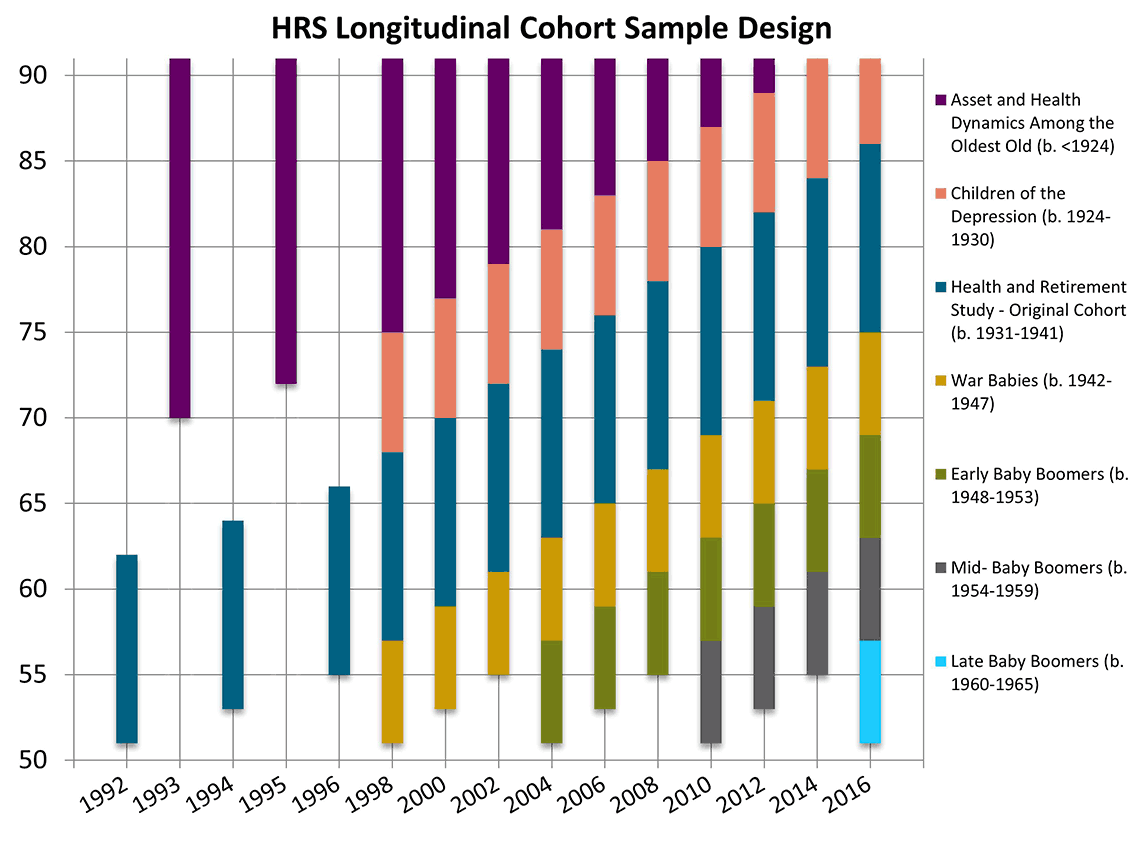

In [5]:
Image("Data/Cohorts-Graph.png", width=700, height=700)

<div style="text-align: justify"> 

As set forth before, the HRS is extraordinarily comprehensive, but that also makes it more complex.Therefore, we will use the <a href='https://www.rand.org/well-being/social-and-behavioral-policy/centers/aging/dataprod/hrs-data.html'>RAND HRS Longitudinal File</a>, which is a user-friendly file derived from all waves. It contains cleaned and processed variables with consistent and intuitive naming conventions, model-based imputations, and spousal counterparts of most individual-level variables. 

For the purpose of this research, a narrower selection in the sample as well as variables will be made from this HRS datafile.
</div>

<a id='Selecting relevant variables'></a>

**Selecting relevant variables**

<div style="text-align: justify"> 
The original file consists of 11,465 variables for 37,495 respondents, but only a few of those are relevant for the research question at hand. Therefore, we provide an overview of the relevant variables, their definition, and measurement:<br>
<br>
*Target*<br>
- Out-of pocket medical expenditures: total expenses for medical care that were not reimbursed by insurance in the previous 2 years, reported in nominal US dollars. 

    Out-of-pocket costs include deductibles, coinsurance, and copayments for covered services plus all costs for services that aren't covered. The survey inclues nine categories of out-of-pocket medical costs: (1) hospital costs; (2) nursing home costs; (3) doctor visits costs; (4) dental costs; (5) outpatient surgery costs; (6) average monthly prescription drug costs; (7) home health care; (8) special facilities costs; and (9) other. <br>
<br>    
*Features*
<br>
 
- Age: calculated as the difference between the respondents’ birthdate and the beginning interview date. The age in years is the integer portion of the number of months old divided by 12.  
<br>

- Gender: the individual’s gender is labeled as either 1.male or 2.female.
<br>

- Race: respondents were asked what they consider to be their primary race, either 1.white/Caucasian, 2.black/African American or 3.other.
<br>

- Education: the number of academic years a person has completed in a formal program provided by elementary and secondary schools, universities, colleges or other formal post-secondary institutions.
<br>

- Income: all income components are summed on the household level and reported in nominal US dollars. 

<br>
- Children: provides the number of living children of the respondent and spouse or partner.

<br>
- Self-reported health: a categorical variable reflecting the self-reported general health status. The respondents are asked to rate their health according to the categories 1 = excellent; 2 = very good; 3 = good; 4 = fair; and 5 = poor.


- BMI: the respondent's body mass index reflects body weight adjusted for height. Height, given in feet and inches, is converted to meters. Weight is converted to kilograms. The final BMI is calculated by the following formula: $BMI = \displaystyle\frac{weight}{height^2}$


- Alcohol: indicates the number of days per week a respondent drinks alcoholic beverages.


- Smoking: indicates whether the respondent currently smokes cigarettes, labeled as either 0.no or 1.yes.


- Covered by government: indicates whether the respondent is covered by any government health insurance program. It is labeled as either 0. no or 1. yes .


- Covered by employer: indicates whether the respondent is covered by health insurance from her/his current or previous employer. It is labeled as either 0.no or 1.yes.

N.b. We have changed most of the labels for our own use when <a href='#Preparing the data'>preparing the data</a>.

</div>

There are cross-wave differences in the data. For example, components of out of pocket medical expenditures are added to the survey over the years. Furthermore, the reference period was prolonged from 1 year to 2 years from wave 3 onwards. In order to make a good prediction, we will focus on the 12th wave. This is the most recent wave for which we have all the relevant data available. The 12th wave contains data from the 2014 survey. 

<a id='Selecting relevant respondents'></a>

**Selecting relevant respondents**

We will focus on the group of eldery between the age of 73 and 83 years old, belonging to the so-called 'orginal cohort' of the HRS (i.e. born in 1931-1941). This group is interesting because on the one hand they incur relatively high medical expenditures, but on the other hand often have a low income. It should be noted that this cohort in the population is unique in the sense that they often still have a financial responsibility for their children, whilst having to save for their own retirement days (<a href='https://blogs.kent.ac.uk/welfsoc/files/2015/05/Rakar-Tatjana-Future-responsibilities-towards-the-elderly-a-comparative-analysis-of-welfare-state-attitudes-and-expectations-in-Norway-and-Slovenia.pdf'>Hrast et al., 2016</a>). Additionally, older people are more vulnerable and more likely to need health care (<a href='https://academic.oup.com/biomedgerontology/article/70/11/1427/2605616'>Bandeen-Roche et al., 2015</a>).

**Final Sample**

In the end, we extract the following variables from the <a href='https://www.rand.org/well-being/social-and-behavioral-policy/centers/aging/dataprod/hrs-data.html'>RAND HRS Longitudinal File</a>: 

| Variable | Code  | Type  |
|------|------|------|
| **Demographics, Identifiers, and Weights**  | **Section A**| |
| Age  | r12agey_b | Continuous |
| Gender  | ragender | Categorical |
| Education  | raedyrs | Continuous |
| Race  | raracem | Categorical |
||||
| **Health**  | **Section B** | |
| Medical care utilization: Out of Pocket | r12oopmd | Continuous|
| Self-reported health| r12shlt |Categorical|
| BMI  | r12bmi | Continuous |
| Alcohol  | r12drinkd | Categorical |
| Smoking | r12smoken |Categorical|
| **Income**  | **Section D** | |
| Total household income  | h12itot | Continuous |
||||
| **Health Insurance**  | **Section G** | |
|Covered by government|r12higov|Categorical|
|Covered by former employer|r12prpcnt|Categorical|
||||
| **Family Structure**  | **Section H** | |
|Number of children|h12child|Continuous|

In the section <a href='#Preparing the data'>preparing the data</a> we will elaborate on our approach to extract and filter this data. 

***

<a id='Methodology'></a>

## Methodology

**Machine Learning**

Machine learning (ML) is the scientific study of algorithms and statistical models that computer systems use to effectively perform a specific task without using explicit instructions, relying on models and inference instead. ML is seen as a subset of artificial intelligence. Some applications of algorithms are face recognition, email spam and malware filtering, product recommendations, speech-to-text and natural language generation. Machine learning algorithms are often categorized as supervised or unsupervised (we will not discuss semi-supervised and reinforcement machine learning algorithms):

- Supervised algorithms require a data scientist or data analyst with machine learning skills to provide both input and desired output. Data scientists determine which variables, or features, the model should analyze and use to develop predictions. Once training is complete, the algorithm will apply what was learned to new data.

- Unsupervised algorithms do not need to be trained with desired outcome data. Instead, they use an iterative approach called deep learning to review data and arrive at conclusions. Unsupervised learning algorithms are used for more complex processing tasks than supervised learning systems.

We will use supervised machine learning, because our goal is to learn a function that, given a sample of data and desired outputs, best approximates the relationship between input (features) and output (out of pocket medical expenditures) observable in the data. 

Supervised learning problems can be further grouped into regression and classification problems: 
- Classification: it is a classification problem when the output variable is a category, such as “disease” and “no disease” or "high risk" and "low risk".
- Regression: it is a regression problem  when the output variable is a real value, such as “dollars” or “weight”.

As our output observable are out of pocket medical expenditures in US dollars, we face a regression problem.

Usually, when working on a machine learning problem with a given dataset, one tries different models and techniques to solve an optimization problem and fits the most accurate model, that will neither overfit nor underfit:

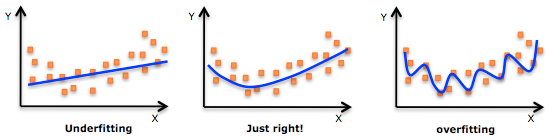

In [6]:
Image("Data/Fitting image.png")

For this assignment, we will use skicit-learn, a machine learning library for the Python programming language. It features various regression algorithms, including linear regression, lasso regression, and random forest  (<a href='http://www.jmlr.org/papers/volume12/pedregosa11a/pedregosa11a.pdf'>Pedregosa et al., 2011</a>).

**Multivariate Linear Regression Model**

In [7]:
YouTubeVideo('CtKeHnfK5uA')

*Model*

A linear regression model fits a linear model with coefficients to minimize the residual sum of squares (RSS) between the observed responses in the dataset, and the responses predicted by the linear approximation. A multivariate linear regression model involves more than 1 predictor, thus has more than 1 slope coefficient. It still estimates all the coefficients by minimizing the  RSS. 

It takes the following form: 

\begin{gather*}
Out\; of\; pocket\; medical\; expenditures =& β_0\; +β1\; x\; age+ β2\; x\; 
gender+  β3\; x \;race+  β4 \;x \;education+  β5\; x \;income\  β6 \;x \;children + β7\; x \;health
\end{gather*}

\begin{gather*}
+  β8 \;x \;bmi+  β2\; x \;alcohol+  β9\; x \;smoking+  β10\; x\; covered \;government+  β11 \;x\; covered\; employer 
\end{gather*}

The  β  values are called the model coefficients. These values are 'learned' during the model fitting step using the least squares criterion. Then, the fitted model can be used to make predictions. 

*Assumptions*

On the one hand, this model is fast, does not require tuning, is highly interpretable, and well-understood. On the other hand, it is unlikely to produce the best predictive accuracy.The model presumes a linear relationship between the features and response. If the relationship is highly non-linear, as with many scenarios, linear relationship will not effectively model the relationship and its prediction would not be accurate.

We will have to deal with the following issues:

- Non-constant variance of residuals (aka "heteroskedasticity"): indicated by funnel shape in residual plot --> transform the variable using a concave function: ln(y), sqrt(y). 


- Outliers: plot studentized residuals: greater than 3 is an outlier --> try removing the observation from the dataset.
    

- Multicollinearity: exists whenever there is a correlation between two or more predictors. Detect pairs of highly correlated variables by examining the correlation matrix for high absolute values --> try removing one of the correlated predictors from the model, or combining them into a single predictor.

It could be that we end up with a large number of features and relatively poor test score compared to the training score. This would be a problem of over-generalization or over-fitting. In that case, we will apply a lasso regression.

Source: <a href='https://books.google.nl/books?hl=en&lr=&id=GOVOCwAAQBAJ&oi=fnd&pg=PP1&dq=linear+regression+python&ots=NcbDPeYQ-I&sig=g8rdRBVIl3CEpiajVrRIvDFGsxE#v=onepage&q=linear%20regression%20python&f=false'>Raschka., 2009</a>.

**Lasso Regression Model**

In [8]:
YouTubeVideo('qU1_cj4LfLY')

_"Everything should be made as simple as possible, but not simpler"_ 

In other words, the best theory is the simplest one that still explains observations.

*Model*

The acronym “LASSO” stands for Least Absolute Shrinkage and Selection Operator. So it is no surprise that Lasso regression is a type of linear regression that uses shrinkage. It reduces model complexity and prevents over-fitting which may result from the previously discussed 'simple' linear regression. 

Lasso regression does this by performing L1 regularization. The model adds a penalty equal to the absolute value of the magnitude of coefficients. This type of regularization can result in sparse models with few coefficients; some coefficients can become zero and eliminated from the model. 

The goal of the algorithm is to minimize:

$SSE = \sum_{i=1}^n (y_i - \sum_{j}x_{ij} \beta_j)^2 + \lambda \sum_{p}^{j=1} |\beta_j| $

Some of the βs are shrunk to exactly zero, resulting in a regression model that’s easier to interpret. 

The tuning parameter λ controls the strength of the L1 penalty. λ is basically the amount of shrinkage:
- When λ = 0, no parameters are eliminated. The estimate is equal to the one found with linear regression.
- As λ increases, more and more coefficients are set to zero and eliminated (theoretically, when λ = ∞, all coefficients are eliminated).
- As λ increases, bias increases.
- As λ decreases, variance increases.

If an intercept is included in the model, it is usually left unchanged.

*Assumptions*

It does not respond well to outliers and should be used with caution in non-clean datasets.

Source: <a href='http://papers.nips.cc/paper/3596-robust-regression-and-lasso.pdf'>Xy et al., 2009</a>.

**Random Forest Model**

In [9]:
YouTubeVideo('D_2LkhMJcfY')

*Model*

The random forest model is one of the machine learning algorithms, a supervised learning algorithm. In general, the Random forest is a fast, simple and flexible tool which performs very well since training and predictions are fast due to the simplicity of underlying decision trees. The main idea of the model is that multiple decision tree will be build which will be merged together to get a more accurate and stable prediction. The algorithm of the Random Forest randomly selects observations and features from the data and builds various decision trees to average the results. Most of the time, the random forest is able to prevent of the time by creatin subsets of features and build smaller trees.
With the model, we can easily measure the relative importance of each feature on the future prediction. 

*Bagging method*

More randomness and diversity is integrated with the bagging method to feature space in the random forest method. The random forests are trained via this bagging method, which consists of randomly sampling subsets of the training data, which fits a model to he smaller data sets (fitting decsision trees to the subsets) and aggregrates the result. The idea of the bagging methods is that combining learning models increases the overall result and give some idea about the correctness of the model. 

*Feature importance*

An important part of the model is its ability to measure the relative of the features on the prediction (the X variables in our  case). By looking at the importances of each variable, we can see which features do not contribute to the prediction process, since the sum of all importance equals 1. In this research we also use the from the Sklearn package, which measures the feature importance by looking at how much the tree nodes will reduce impority between all the trees in the random forest (<a href='https://towardsdatascience.com/the-random-forest-algorithm-d457d499ffcd/'>source </a>).


*Assumptions*
- Since we deal with a continuous Y variable, we use the RandomForestRegressor instead of the Classifier. 
- Predicted values at each node is the average response variable for the observations in the node 
- Overfitting is a problem that may occur in machine learning (and random forest model) and could lead to worse performance of the model. If a model performs way better on a training set than the test set, it is likely that the model is overfitting and the trends in the data is too noisy. If the model is overfitting, we can be less accurate about the outcomes of the model. When more features are added to the model, this could also lead to overfitting.
- The accuracy of the model also depends on its hyperparameters. The random forest adds more randomness to the model while growing trees to search for the best feature among the random subset of features. in this research we use the standard parameters of the RandomForestRegressor. 
- The random forest is a tool mainly used for predictions and not descriptions, so it is not the optimal approach to describe relationships in the data.
- The model can handle different types of feature types, so we can take this into account when handling the data.
- A disadvantage of the model is that the results are not easily interpretable and it can be hard to draw conclusions about the meaning of the model. Since we will produce a simple version of the model we take this into account.

***

<a id='Preparing the data'></a>

## Preparing the data

Since the original dataset consists of 11,465 variables for 37,495 respondents, we cannot directly load this into Python. Therefore, we extracted the <a href='#Selecting relevant variables'>relevant variables</a> in Stata and subsequently load this dataset into the notebook. Any further preparations of the data in order to be able to analyze it, will be done in Python.

In [10]:
# Importing the data
dataframe = pd.read_stata('/home/u1267042/Final map/Dataset wave12 final set.dta')

# Creating a Pandas Dataframe
df = pd.DataFrame(dataframe)

# Getting a first look
df.head()

,ragender,raracem,raedyrs,r12agey_b,r12shlt,r12bmi,r12smoken,r12drinkd,r12oopmd,h12itot,r12higov,r12prpcnt,h12child
0,1.male,1.white/caucasian,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.female,1.white/caucasian,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.male,1.white/caucasian,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.female,1.white/caucasian,16,75.0,4.fair,23.2,0.no,0.0 or doesnt drink,1940.0,703500.0,1.yes,0.0,5.0
4,1.male,1.white/caucasian,12,74.0,3.good,20.9,0.no,0.0 or doesnt drink,144.0,12000.0,1.yes,0.0,0.0


It is often said that 80% of the effort of analysis is in data cleaning. The paper <a href='https://www.researchgate.net/publication/215990669_Tidy_data'>Tidy data </a> by Hadley Wickham (2014) offers a set of tools that are useful to deal with a large number of messy data sets.

In [11]:
# Renaming the columns
df.rename(columns=
          {'ragender': 'gender',
           'raedyrs' : 'education',
           'r12agey_b' : 'age',
           'r12shlt' : 'health',
           'r12bmi' : 'bmi',
           'r12smoken' : 'smoking',
           'r12drinkd' : 'alcohol',
           'r12oopmd' : 'out of pocket',
           'h12itot' : 'income',
           'raracem' : 'race',
           'h12child' : 'children',
           'r12higov' : 'covered_government',
           'r12prpcnt' : 'covered_employer',           
          }, inplace=True) # the column is renamed in place

In [12]:
# Inspecting the data
print('This dataframe consists of',df.shape[0],'rows and',df.shape[1],'columns')

This dataframe consists of 37495 rows and 13 columns


In [13]:
# Counting missing values
df.isnull().sum().sort_values(ascending=False)

bmi                   19053
children              19049
covered_employer      18983
covered_government    18898
smoking               18857
alcohol               18838
health                18764
income                18748
out of pocket         18748
age                   18748
education               127
race                     84
gender                    0
dtype: int64

We have missing values in each column except for gender. We will handle this <a href='#later on'>later on</a> in the notebook, after we have made all of our variables ready for analysis.

In [14]:
# Converting categorical and ordinal features into numeric features
replacements0 = {
    '1.white/caucasian': 1,
    '2.black/african american': 2,
    '3.other' : 3
}
df['race'].replace(replacements0, inplace=True)

replacements1 = {
  '0.none':0,
  '17.17+ yrs': 17
}
df['education'].replace(replacements1, inplace=True)

replacements2 = { 
  '5.poor': 1, 
  '4.fair': 2,
  '3.good': 3,
  '2.very good': 4,
  '1.excellent': 5
}
df['health'].replace(replacements2, inplace=True)

replacements3 = {
  '0.0 or doesnt drink': 0
}
df['alcohol'].replace(replacements3, inplace=True)

replacements4 = {
  '0.no':0,
  '1.yes': 1
}
df['covered_government'].replace(replacements4, inplace=True)

The fourth replacement in the cell above effectively creates a dummy variable, which can only take a value of 0 or 1. Another way to create a dummy variables uses the map-function:

In [15]:
# Creating dummy variables 
df['gender'] = df.gender.map({'2.female':0, '1.male':1})
df['smoking'] = df.smoking.map({'0.no': 0, '1.yes': 1})

In [16]:
df0 = df[['out of pocket', 'age', 'gender', 'race', 'education', 'income','children',\
      'health', 'bmi', 'alcohol', 'smoking', 'covered_government', 'covered_employer']]

<a id='before'></a>

We have to create mulptiple dummy variables for the  variables 'race', 'health', and 'alcohol', because these have multiple categories. 

When estimating models with regularization, which is the case in the ridge regression, we should not leave out any columns. The regularization takes care of the singularities, and more important, the prediction obtained may depend on which columns you leave out. That will not happen when you do not use regularization. Therefore, we will have two datasets: "df" with the reference column left out and "df3" with all dummies included.

In [17]:
# Creating multiple dummy variables using get_dummies
race_dummies = pd.get_dummies(df.race, prefix='race')
health_dummies = pd.get_dummies(df.health, prefix='health')
alcohol_dummies = pd.get_dummies(df.alcohol, prefix='alcohol')


# Concatenating the dummy variable columns onto the DataFrame df3
df = pd.concat([df, race_dummies], axis=1)
df = pd.concat([df, health_dummies], axis=1)
df = pd.concat([df, alcohol_dummies], axis=1)

However, we do have to exclude the first dummy column for the linear regression. Leaving the first column out as a reference, we are effectively setting the baselines to 'Caucasians', 'poor health', and '0' alcohol. We can do this, because if we know values of k-1 dummies in the data we automatically know the values of that last one dummy. We will exclude them before starting the <a href='#Linear Regression Model'>analysis</a>.

In [18]:
# Changing the order of columns
cols = list(df.columns.values)
df = df[['out of pocket', 'age', 'gender', 'race_2.0', 'race_3.0', 'education', 'income','children',\
      'health_2.0', 'health_3.0', 'health_4.0', 'health_5.0', 'bmi', 'alcohol_1.0', 'alcohol_2.0', 'alcohol_3.0', \
      'alcohol_4.0',  'alcohol_5.0', 'alcohol_6.0', 'alcohol_7.0', 'smoking', 'covered_government', 'covered_employer']]

In [19]:
# Retrieving data types
print(df.dtypes)

out of pocket         float64
age                   float64
gender                  int64
race_2.0                uint8
race_3.0                uint8
education             float64
income                float64
children              float64
health_2.0              uint8
health_3.0              uint8
health_4.0              uint8
health_5.0              uint8
bmi                   float64
alcohol_1.0             uint8
alcohol_2.0             uint8
alcohol_3.0             uint8
alcohol_4.0             uint8
alcohol_5.0             uint8
alcohol_6.0             uint8
alcohol_7.0             uint8
smoking               float64
covered_government    float64
covered_employer      float64
dtype: object


Notice the value _inf_ (infinity), which is a value that is greater than any other value. In contrast, the value _-inf_ is  smaller than any other value.

In [20]:
# Handling infinite values
df.replace([np.inf], np.nan, inplace=True)
df.replace([-np.inf], np.nan, inplace=True)
df.head()

,out of pocket,age,gender,race_2.0,race_3.0,education,income,children,health_2.0,health_3.0,...,alcohol_1.0,alcohol_2.0,alcohol_3.0,alcohol_4.0,alcohol_5.0,alcohol_6.0,alcohol_7.0,smoking,covered_government,covered_employer
0,NaN,NaN,1,0,0,16.0,NaN,NaN,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,NaN,NaN,0,0,0,8.0,NaN,NaN,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,NaN,NaN,1,0,0,12.0,NaN,NaN,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3,1940.0,75.0,0,0,0,16.0,703500.0,5.0,1,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
4,144.0,74.0,1,0,0,12.0,12000.0,0.0,0,1,...,0,0,0,0,0,0,0,0.0,1.0,0.0


NaN stands for "Not a Number", so it is not possible to do arithmetic with it.

<a id='later on'></a>

As seen before, we have missing values in each column except for gender, but our models cannot handle missing data. The simplest resolution would be to remove observations that have missing data. However, removing missing data can introduce a lot of issues. When data is randomly missing, you potentially lose a lot of your data. When data is non-randomly missing, in addition to losing data, you are also introducing potential biases. When applying this approach, we would lose almost 50 per cent of our data (we would be left with 18,155/37,495 entries). Therefore, this solution would not be optimal.

An alternative solution is to use imputation by replacing missing values with another value. There are many options we could consider when replacing a missing value, for example a random value, mean, median, mode or a value estimated by another predictive model. We opt for the median, because the dataset has great outliers.

We use the scikit-learn library, which provides the Imputer() pre-processing class that can be used to replace missing values. The Imputer class operates directly on the NumPy array instead of the DataFrame.

In [21]:
# Handling missing data
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit(df)
df = pd.DataFrame(data=imp.transform(df) , columns=df.columns)

# Recounting missing values 
df.isnull().sum().sort_values(ascending=False)

covered_employer      0
health_4.0            0
age                   0
gender                0
race_2.0              0
race_3.0              0
education             0
income                0
children              0
health_2.0            0
health_3.0            0
health_5.0            0
covered_government    0
bmi                   0
alcohol_1.0           0
alcohol_2.0           0
alcohol_3.0           0
alcohol_4.0           0
alcohol_5.0           0
alcohol_6.0           0
alcohol_7.0           0
smoking               0
out of pocket         0
dtype: int64

For the purpose of this research, and explained in the section about <a href='#Selecting relevant respondents'>selecting relevant respondents</a>, we only want to look at people from the 3rd cohort aged between 73 and 83 years old.

In [22]:
df = df[~(df['age'] <= 72)] 
df = df[~(df['age'] >= 84)] 

We will visualize some variables to detect the presence of outliers:

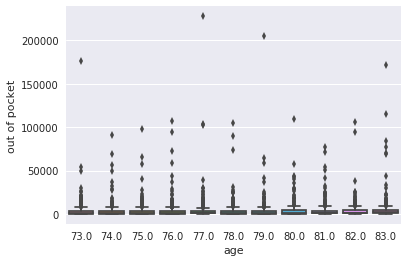

In [32]:
sns.boxplot(x=df["age"], y=df["out of pocket"], data=pd.melt(df))

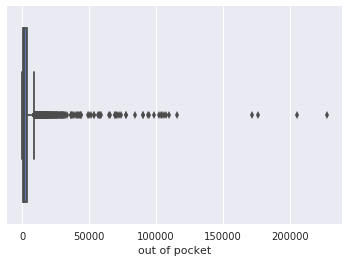

In [33]:
sns.boxplot(x=df["out of pocket"])

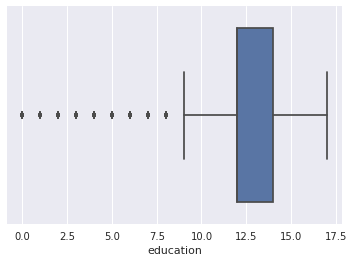

In [34]:
sns.boxplot(x=df["education"])

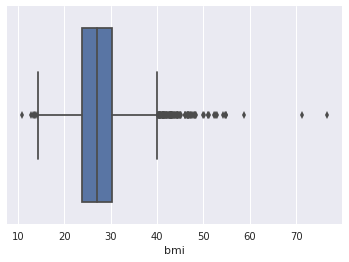

In [35]:
sns.boxplot(x=df["bmi"])

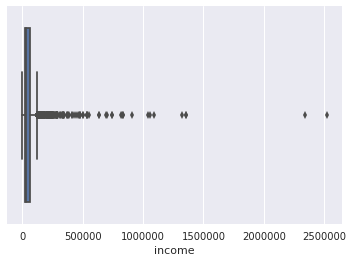

In [36]:
sns.boxplot(x=df["income"])

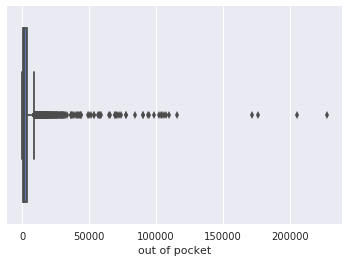

In [37]:
sns.boxplot(x=df["out of pocket"])

An outlier is an observation that deviates drastically from other observations in a dataset. We will use the Interquartile Range (IQR). Any point which falls more than 1.5 times the interquartile range above the third quartile or below the first quartile will be seen as an outlier and thus be removed.

In [38]:
# Creating a set of variables that the IQR has to apply to
df3 = df[['income', 'bmi', 'out of pocket']]

# Calculating the first and third quartile
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Calculating interquartile range
IQR = Q3 - Q1

# Calculating the outlier cutoff
cut_off = IQR * 1.5
lower = Q1 - cut_off
upper = Q3 + cut_off

# Removing outliers
df = df[~((df3 < lower) |(df3 > upper)).any(axis=1)]

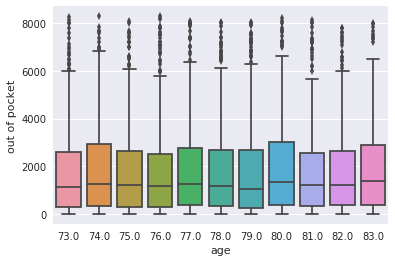

In [39]:
sns.boxplot(x=df["age"], y=df["out of pocket"], data=pd.melt(df))

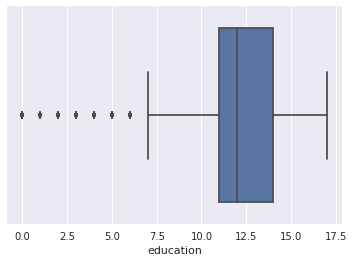

In [40]:
sns.boxplot(x=df["education"])

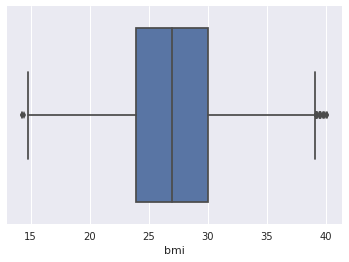

In [41]:
sns.boxplot(x=df["bmi"])

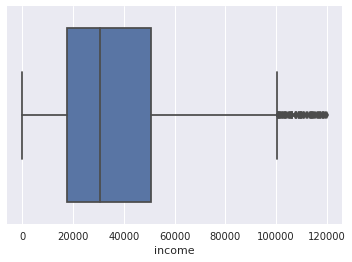

In [42]:
sns.boxplot(x=df["income"])

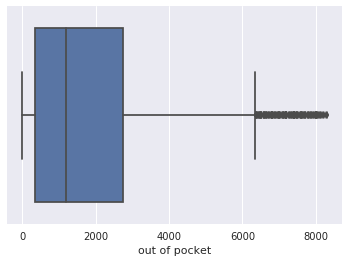

In [43]:
sns.boxplot(x=df["out of pocket"])

A train/test split is a method for splitting our dataset into two groups: a training group of data-points that will be used to train the model, and a testing group that will be used to test it. It is usually split inequaly, because training the model requires as much data-points as possible. A ratio of 80/20 for train/test is common.

In [44]:
# Constructing of X data set containing the prediction variables as well as the vector y containing the data to be predicted.
X = df.drop('out of pocket', axis=1)
Y = df['out of pocket']

# Splitting of X and Y into two parts each, which will be used for training (80%) and testing (20%) the model.
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.2, random_state = 1) 

print ('Number of training data:',len(X_Train))
print ('Number of testing data:',len(X_Test))

Number of training data: 3287
Number of testing data: 822


In [45]:
# Check the shape of X and Y
print(X_Train.shape)
print(X_Test.shape)
print(Y_Train.shape)
print(Y_Test.shape)

(3287, 22)
(822, 22)
(3287,)
(822,)


We see that the 80/20 train/test ratio succeeded. We have 3000 observations in the train set, and 750 observations in the test set. There are 22 features to predict the out of pocket medical expenditures.

***

<a id='Results'></a>

## Results

<a id='Descriptive Statistics'></a>

### Descriptive statistics

Some machine learning algorithms like linear and logistic regression can suffer poor performance if there are highly correlated attributes in your dataset. As such, it is a good idea to review all of the pair-wise correlations of the attributes in your dataset. You can use the corr() function on the Pandas DataFrame to calculate a correlation matrix.

In [46]:
print('The final training dataframe consists of',X_Train.shape[0],'rows and',X_Train.shape[1],'columns')
print('The final test dataframe consists of',X_Test.shape[0],'rows and',X_Test.shape[1],'columns')

The final training dataframe consists of 3287 rows and 22 columns
The final test dataframe consists of 822 rows and 22 columns


In [47]:
df.describe()

,out of pocket,age,gender,race_2.0,race_3.0,education,income,children,health_2.0,health_3.0,...,alcohol_1.0,alcohol_2.0,alcohol_3.0,alcohol_4.0,alcohol_5.0,alcohol_6.0,alcohol_7.0,smoking,covered_government,covered_employer
count,4109,4109,4109,4109,4109,4109,4109,4109,4109,4109,...,4109,4109,4109,4109,4109,4109,4109,4109,4109,4109
mean,1862,77,0,0,0,12,37829,4,0,0,...,0,0,0,0,0,0,0,0,1,0
std,1976,3,0,0,0,3,26032,2,0,0,...,0,0,0,0,0,0,0,0,0,1
min,0,73,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25%,336,75,0,0,0,11,17612,2,0,0,...,0,0,0,0,0,0,0,0,1,0
50%,1200,77,0,0,0,12,30600,3,0,0,...,0,0,0,0,0,0,0,0,1,0
75%,2743,80,1,0,0,14,50800,5,0,1,...,0,0,0,0,0,0,0,0,1,1
max,8300,83,1,1,1,17,120009,20,1,1,...,1,1,1,1,1,1,1,1,1,10


correlation with respect to out of pocket expenditures


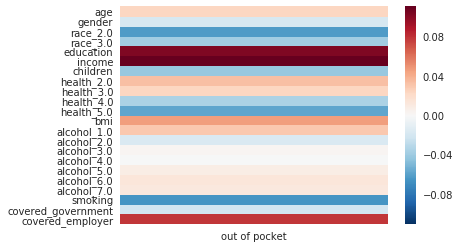

In [48]:
sns.heatmap(df.corr()[['out of pocket']].iloc[1:])
print('correlation with respect to out of pocket expenditures')

**Motivation**

Correlations between the variables


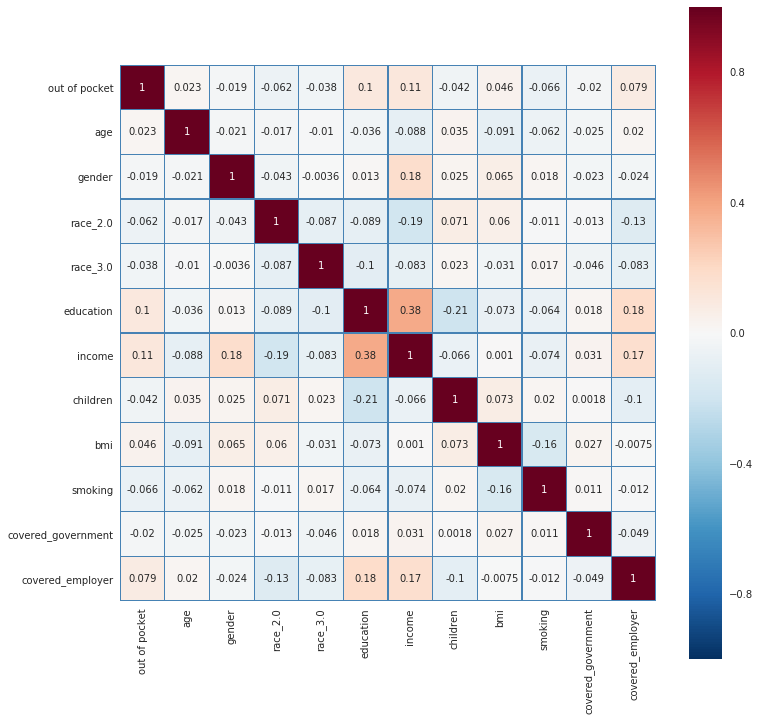

In [49]:
# Displaying Pearson's correlations
plt.figure(figsize=(12,12)) 
sns.heatmap(df[['out of pocket', 'age', 'gender', 'race_2.0', 'race_3.0', 'education', 'income','children', 'bmi', \
'smoking', 'covered_government', 'covered_employer']].corr(method='pearson'), linewidth=0.2,vmax=1.0,square=True, linecolor='steelblue', annot=True)
print('Correlations between the variables')

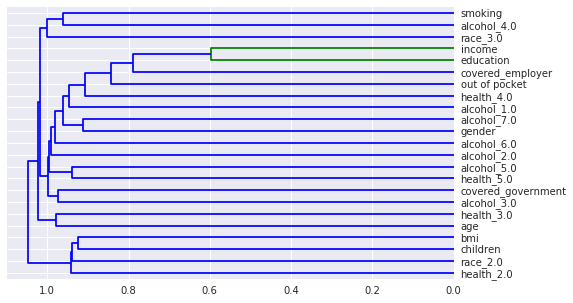

In [50]:
corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(8,5))
dendrogram = hc.dendrogram(z, labels=df.columns, 
      orientation='left', leaf_font_size=10)
plt.show()

The figures above show the correlations between the variables in our data, which is interesting to know to see which variables move in the same direction. In the first figure we can see that some variables are (relatively) highly correlated to each other. In this case, some correlations are less relevant like for the health dummies to each other. The correlation between log_income and education is (positively) high, which makes sense since people with a higher education have higher earnings in general.
In the second figure the correlations with respect to out of pocket are visualized, which is visualized relative to each other. We can see that log_income, education and smoking show the most outstanding correlation. Log_income and education are positively correlated to out of pocket expenditures (and also to another) and smoking is negatively correlated.
However, correlations do not necessarily imply causation so we cannot draw conclusions from this and many factors can play a role which are not taken into account.

**Uitleg**

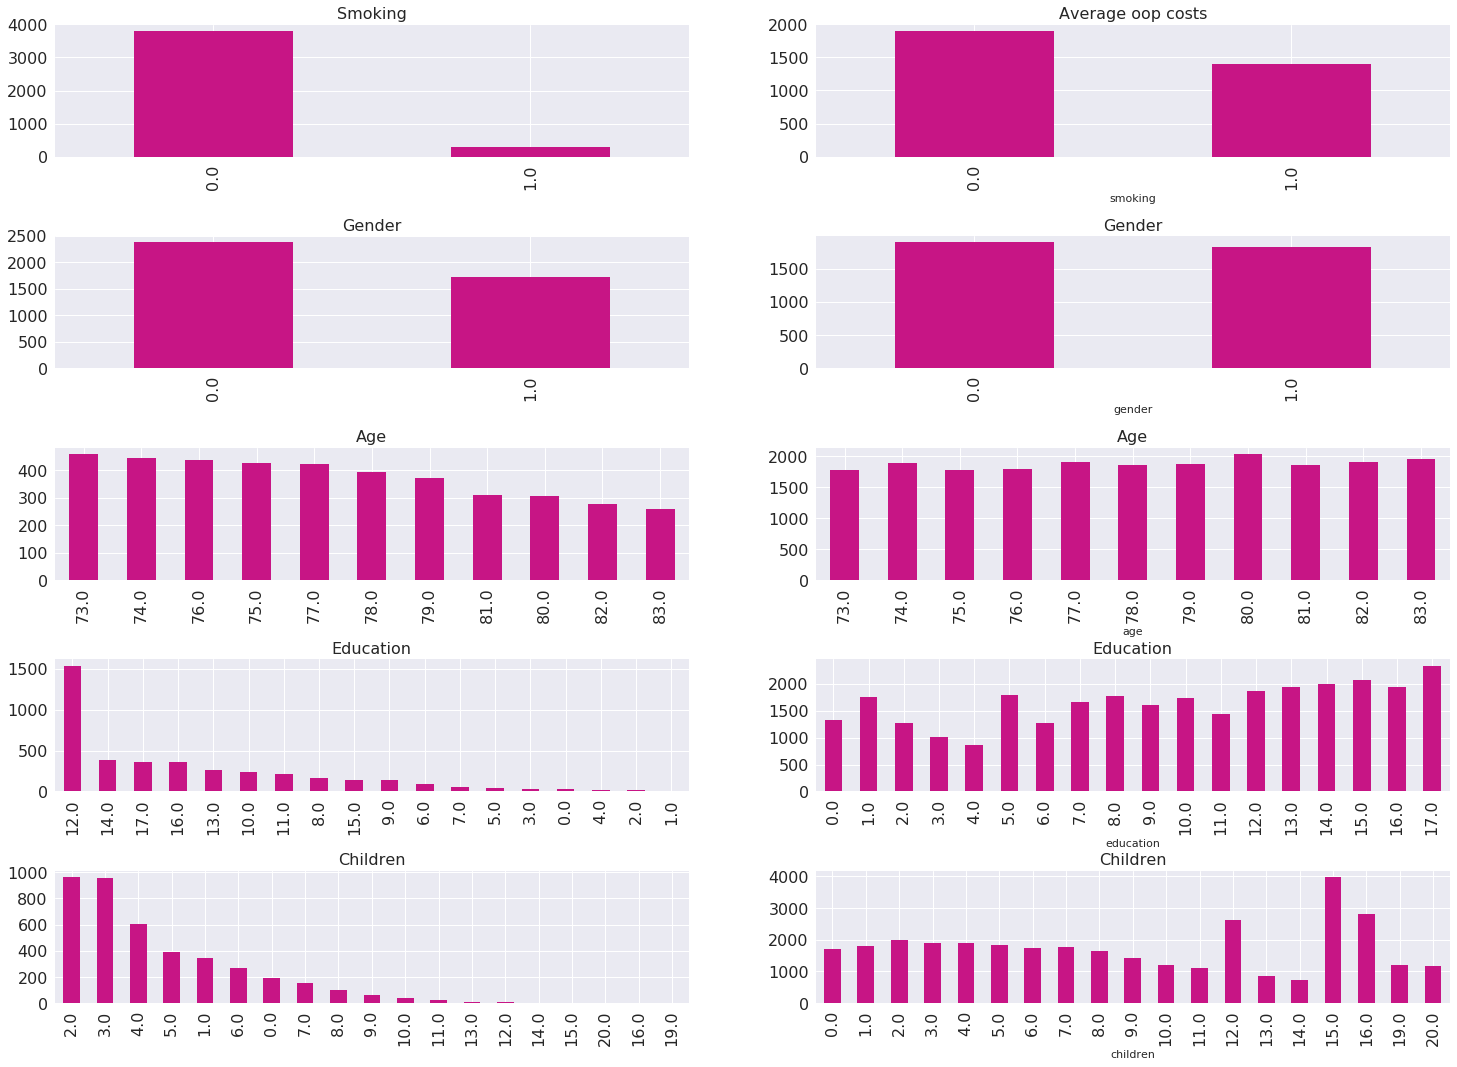

In [51]:
fig, axarr = plt.subplots(5, 2, figsize=(25, 18))                            
df['smoking'].value_counts().plot.bar(ax=axarr[0][0], fontsize=16, color='mediumvioletred')
axarr[0][0].set_title("Smoking", fontsize=16)
df.groupby('smoking')['out of pocket'].mean().plot.bar(y = "out of pocket" ,color='mediumvioletred',ax=axarr[0][1],fontsize=16)
axarr[0][1].set_title("Average oop costs", fontsize=16)
df['gender'].value_counts().plot(ax=axarr[1][0], fontsize=16, color='mediumvioletred', kind='bar')
axarr[1][0].set_title("Gender", fontsize=16)
df.groupby('gender')['out of pocket'].mean().plot.bar(ax=axarr[1][1],color='mediumvioletred',fontsize=16)
axarr[1][1].set_title("Gender", fontsize=16)
df['age'].value_counts().plot.bar(ax=axarr[2][0], fontsize=16, color='mediumvioletred')
axarr[2][0].set_title("Age", fontsize=16)
df.groupby('age')['out of pocket'].mean().plot.bar(y = "out of pocket" ,color='mediumvioletred',ax=axarr[2][1], fontsize=16)
axarr[2][1].set_title("Age", fontsize=16)
df['education'].value_counts().plot.bar(ax=axarr[3][0], fontsize=16,color='mediumvioletred')
axarr[3][0].set_title("Education", fontsize=16)
df.groupby('education')['out of pocket'].mean().plot.bar(ax=axarr[3][1],color='mediumvioletred',fontsize=16)
axarr[3][1].set_title("Education", fontsize=16)

df['children'].value_counts().plot.bar(ax=axarr[4][0], fontsize=16,color='mediumvioletred')
axarr[4][0].set_title("Children", fontsize=16)
df.groupby('children')['out of pocket'].mean().plot.bar(ax=axarr[4][1],color='mediumvioletred',fontsize=16)
axarr[4][1].set_title("Children", fontsize=16)
plt.subplots_adjust(hspace=.6)

From the plots above we can see that some variables are quite distributed. If we look at smoking we can see that only a small fraction of the elderly smoke. This is surprising, since we expected to have a high group of smokers because in the past it was normal for people to smoke, so also for this generation. The average out of pocket costs are also higher for the non-smokers, but we can probably not draw conclusions with this dataset of smoking on out of pocket costs since the group smokers is too small. 
Another striking conclusion is the distribution of education, since the plot shows that most of the people went to school for 12 years. A potential reason might be due that people did continue studying after high school. 

In [52]:
data = [go.Histogram(x=df['bmi'])] 
py.iplot(data, filename = 'basic-line', auto_open=True)

In [53]:
data = [go.Histogram(x=df['income'])] 
py.iplot(data, filename = 'income', auto_open=True)        

***

### Ordinary Least Squares

OLS or Ordinary Least Squares OLS is a statistical method of finding the relationship between independent and dependent variables. The objective is to minimize the error between the data points (observed) and the points on the line (predicted):


$SSE = \sum_{i=1}^{n} (y_i - \hat{y})^2$


It is a relatively simple application of linear algebra and optimization techniques that show up all the time in machine learning. 

In [55]:
# Running an OLS
X_Train1 = X_Train
X_Train1 = pd.concat([pd.DataFrame(np.ones((X_Train1.shape[0], 1)).astype(int),
                                  index=X_Train1.index), X_Train1], axis=1)
X_Train1.rename(columns={0: 'const'}, inplace=True)

X_opt = X_Train1[['age', 'gender', 'race_2.0', 'race_3.0', 'education', 'income','children',\
      'health_2.0', 'health_3.0', 'health_4.0', 'health_5.0', 'bmi', 'alcohol_1.0', 'alcohol_2.0', 'alcohol_3.0', \
      'alcohol_4.0',  'alcohol_5.0', 'alcohol_6.0', 'alcohol_7.0', 'smoking', 'covered_government', 'covered_employer']]
OLS = sm.OLS(endog = Y_Train, exog = X_opt).fit()
OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          out of pocket   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     145.8
Date:                Thu, 31 Jan 2019   Prob (F-statistic):               0.00
Time:                        13:40:05   Log-Likelihood:                -29492.
No. Observations:                3287   AIC:                         5.903e+04
Df Residuals:                    3265   BIC:                         5.916e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
age                   14.6364      4.178      3.504      0.000       6.446      22.827
gender              -242.2695     70.096     -3.456      0.001    -379.707    -104.832
race_2.0            -290.9228     96.371     -3.019      0.003    -479.877    -101.969
race_3.0            -191.6374    175.692     -1.091      0.275    -536.115     152.840
education             52.0148     11.826      4.398      0.000      28.827      75.203
income                 0.0071      0.001      4.848      0.000       0.004       0.010
children             -17.9490     15.149     -1.185      0.236     -47.651      11.753
health_2.0           -80.0181    133.098     -0.601      0.548    -340.981     180.945
health_3.0          -280.3918    130.261     -2.153      0.031    -535.793     -24.990
health_4.0          -575.0916    135.893     -4.232      0.000    -841.536    -308.647
health_5.0          -901.7240    183.877     -4.904      0.000   -1262.250    -541.198
bmi                   20.1632      7.081      2.847      0.004       6.279      34.047
alcohol_1.0          213.5131    117.170      1.822      0.069     -16.221     443.247
alcohol_2.0         -204.2554    149.419     -1.367      0.172    -497.221      88.710
alcohol_3.0          -80.4666    191.089     -0.421      0.674    -455.132     294.199
alcohol_4.0          201.3795    246.727      0.816      0.414    -282.376     685.135
alcohol_5.0           23.6507    250.311      0.094      0.925    -467.133     514.434
alcohol_6.0           60.0478    348.327      0.172      0.863    -622.913     743.009
alcohol_7.0          125.3388    131.780      0.951      0.342    -133.041     383.719
smoking             -353.9330    129.938     -2.724      0.006    -608.701     -99.165
covered_government  -263.0885    238.279     -1.104      0.270    -730.280     204.103
covered_employer     142.3360     57.620      2.470      0.014      29.361     255.311
==============================================================================
Omnibus:                      658.967   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1131.763
Skew:                           1.318   Prob(JB):                    1.74e-246
Kurtosis:                       4.148   Cond. No.                     4.78e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
print('The R-square score for the OLS: {:.2f}'.format(OLS.rsquared))

The R-square score for the OLS: 0.50


We have a higher R-squared, and 11 coefficients are significant at a 5% significance level.

***

<a id='Linear Regression Model'></a>

### Multivariate Linear Regression

As mentioned <a href='#before'>before</a>, we do have to exclude the first dummy column for the linear regression. Leaving the first column out as a reference, we are effectively setting the baselines to 'Caucasians', 'poor health', and '0' alcohol. We can do this, because if we know values of k-1 dummies in the data we automatically know the values of that last one dummy. 

**Fitting and predicting**

In [57]:
# Fitting the model to the training data 
lr = LinearRegression()
lr.fit(X_Train, Y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
# Making predictions on the testing set
y_pred = lr.predict(X_Test)

Making a prediction of out of pocket medical expenditures with the following characteristis:

- age = 82 years
- gender = male
- race = black/African American
- education = 10 years
- income = 25000$
- children = 2
- health = very good
- bmi = 24
- alcohol = 3 days a week)
- smoking = yes
- covered_government = yes
- covered_employer = no

In [59]:
lr.predict([82,1,1,0,10,25000,4,1,0,0,0,24,0,0,1,0,0,0,0,1,1,0])

array([1024.72163869])

We could compare this to a prediction of someone with similar characteristics, but e.g. without being covered by the government and with a higher bmi:

In [60]:
lr.predict([82,1,1,0,10,25000,4,1,0,0,0,32,0,0,1,0,0,0,0,1,0,0])

array([1429.45684922])

As could be expected, this results in higher predicted out of pocket medical expenditures (over a 2-year period).

**Interpreting**

We will now obtain the exact values for the estimated coefficients:

In [61]:
# Calculating coefficients
coeff = DataFrame(X_Train.columns)
coeff['Coefficient Estimate'] = Series(lr.coef_)
coeff

,0,Coefficient Estimate
0,age,19
1,gender,-242
2,race_2.0,-288
3,race_3.0,-187
4,education,53
5,income,0
6,children,-18
7,health_2.0,-73
8,health_3.0,-275
9,health_4.0,-568


Ceteris paribus, each year increase in age is associated with a 19$ increase of out of pocket medical expenditures. 

Both being black/African American or another is associated with a decrease in out of pocket medical expenditures as compared to being white/Caucasian, which is the baseline level.

It is important to note that these are a statements of association, not causation.

**Evaluating**

We will use the R-square and mean squared error to evaluate the model.

The R-square determines how much of the total variation in Y (target variable) is explained by the variation in X (features). The value of R-square is always between 0 and 1, where 0 means that the model does not model explain any variability in the target variable (Y) and 1 meaning it explains full variability in the target variable. Now let us check the R-square for the above model.

In [62]:
score = sk.metrics.r2_score(Y_Test, y_pred)
print('The R-square score for the multivariate linear regression model is: {:.2f}'.format(score))

The R-square score for the multivariate linear regression model is: 0.02


In this case, R² is 4%, meaning, only 4% of variance in out of pocket medical expenditures is explained by the features included in the model. In other words, if you know someone's features, you will have 4% information to make an accurate prediction about his or her out of pocket medical expenditures for a 2-year period.

In [63]:
# Calculating the mean square error 
mse = mean_squared_error(Y_Test,y_pred) 

# Calculating the R square
r2_score = r2_score(Y_Test,y_pred) 

print ('Mean square error:',mse)
print ('R-square:',r2_score)
print('The R-square score for the multivariate linear regression model is: {:.2f}'.format(r2_score))

Mean square error: 4147498.869868298
R-square: 0.01618704273920679
The R-square score for the multivariate linear regression model is: 0.02


In [64]:
# Score on the Train set
print("Score on the Train set:", lr.score(X_Train, Y_Train))

# Score on the Test set
print("Score on the Test set:",lr.score(X_Test, Y_Test))

Score on the Train set: 0.048534587812540275
Score on the Test set: 0.01618704273920679


We will take a look at the residual vs fitted values plot:

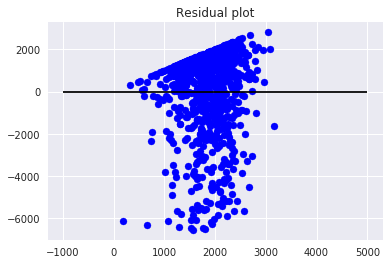

In [65]:
x_plot = plt.scatter(y_pred, (y_pred - Y_Test), c='b')
plt.hlines(y=0, xmin= -1000, xmax=5000)
plt.title('Residual plot')

We can see a funnel like shape in the plot. This shape indicates Heteroskedasticity. The presence of non-constant variance in the error terms results in heteroskedasticity. We can clearly see that the variance of error terms(residuals) is not constant. Generally, non-constant variance arises in presence of outliers or extreme leverage values. These values get too much weight, thereby disproportionately influencing the model’s performance. When this phenomenon occurs, the confidence interval for out of sample prediction tends to be unrealistically wide or narrow. 

The scatter plot indicates signs of non linearity in the data which has not been captured by the model. In order to capture this non-linear effects, one could try a polynomial regression. 

<a id='Lasso Regression'></a>

### Lasso Regression

**Why do we check the magnitude of coefficients?**

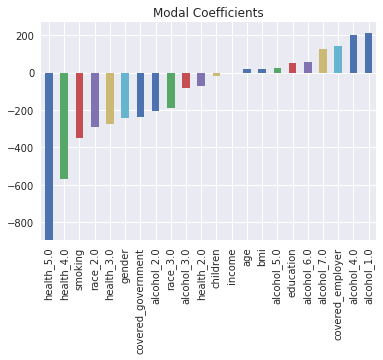

In [66]:
# Checking the magnitude of coefficients
predictors = X_Train.columns
coef = Series(lr.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

We can see that coefficients of excellent and very good health are much higher as compared to rest of the coefficients. Hence, someone's out of pocket medical expenditues would be more driven by these two features.

**Fitting**

Alpha = 0.01

In [67]:
lasso001 = Lasso(alpha=0.01, normalize = True)
lasso001.fit(X_Train,Y_Train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [68]:
train_score001=lasso001.score(X_Train,Y_Train)
test_score001=lasso001.score(X_Test,Y_Test)
print("Training score: {:.3f}".format(train_score001))
print("Test score: {:.3f}".format(test_score001))

Training score: 0.049
Test score: 0.016


In [69]:
coeff_used001 = np.sum(lasso001.coef_!=0)
print("Number of features used {:.0f}".format(coeff_used001))

Number of features used 22


Alpha = 0.3

In [70]:
lasso03 = Lasso(alpha=0.3, normalize = True)
lasso03.fit(X_Train,Y_Train)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [71]:
train_score03=lasso03.score(X_Train,Y_Train)
test_score03=lasso03.score(X_Test,Y_Test)
print("Training score: {:.3f}".format(train_score03))
print("Test score: {:.3f}".format(test_score03))

Training score: 0.046
Test score: 0.021


In [72]:
coeff_used03 = np.sum(lasso03.coef_!=0)
print("Number of features used {:.0f}".format(coeff_used03))

Number of features used 20


Alpha = 1

In [73]:
lasso = Lasso()
lasso.fit(X_Train,Y_Train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [74]:
train_score1=lasso.score(X_Train,Y_Train)
test_score1=lasso.score(X_Test,Y_Test)
print("Training score: {:.3f}".format(train_score1))
print("Test score: {:.3f}".format(test_score1))

Training score: 0.048
Test score: 0.017


In [75]:
coeff_used1 = np.sum(lasso.coef_!=0)
print("Number of features used {:.0f}".format(coeff_used1))

Number of features used 20


The following graph clearly shows that excellent health is the most important variable in terms of predicting out of pocket medical expenditures. 

[ 1.91995190e+01 -2.33387686e+02 -2.79339441e+02 -1.57613744e+02
  5.24229444e+01  7.17248323e-03 -1.78145433e+01 -2.04691918e+01
 -2.19851160e+02 -5.10014758e+02 -8.21187678e+02  2.10576634e+01
  1.95792893e+02 -1.93169388e+02 -5.82855124e+01  1.42933402e+02
  0.00000000e+00  0.00000000e+00  1.06465291e+02 -3.31163841e+02
 -1.82160096e+02  1.41147026e+02]


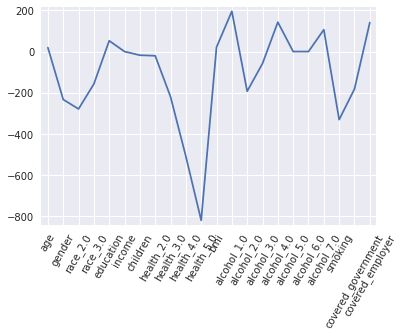

In [76]:
# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
colnames = X.columns
plt.plot(range(len(colnames)), lasso_coef)
plt.xticks(range(len(colnames)), colnames.values, rotation=60) 
plt.margins(0.02)
plt.show()

The training and test scores are similar to basic linear regression case.
In the right panel of figure, for alpha = 0.0001, coefficients for Lasso regression and linear regression show close resemblance.

The most common approach to find the best-trained algorithm is K-fold cross validation. In k-fold cross-validation, the original sample is randomly partitioned into k equal sized subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k − 1 subsamples are used as training data. The cross-validation process is then repeated k times, with each of the k subsamples used exactly once as the validation data. The advantage of this method over repeated random sub-sampling (see below) is that all observations are used for both training and validation, and each observation is used for validation exactly once. We will use the commonly chosen K=5:

In [77]:
# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X_Train, Y_Train, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

# find the mean of our cv scores here
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.04015026 0.04268451 0.03131461 0.02854259 0.03885677]
Average 5-Fold CV Score: 0.036309746142632736


The following graph will visualize this by showing how picking a different alpha score changes the R-square:

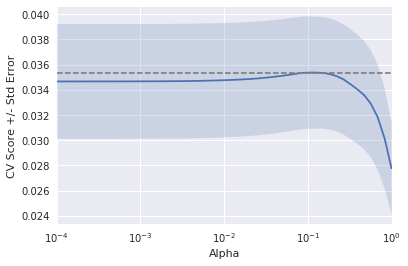

In [78]:
# Create an array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
lasso9_scores = []
lasso9_scores_std = []

# Create a lasso regressor: lasso9
lasso9 = Lasso(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: lasso.alpha
    lasso9.alpha = alpha
    
    # Perform 10-fold CV: lasso09_cv_scores
    lasso9_cv_scores = cross_val_score(lasso9, X_Train, Y_Train, cv=10)
    
    # Append the mean of lasso09_cv_scores to ridge_scores
    lasso9_scores.append(np.mean(lasso9_cv_scores))
    
    # Append the std of lasso09_cv_scores to ridge_scores_std
    lasso9_scores_std.append(np.std(lasso9_cv_scores))

# Use this function to create a plot    
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

    # Display the plot
display_plot(lasso9_scores,lasso9_scores_std)

The highest score we can achieve is a R-squared of 0.036, which is really low.

***

<a id='Random Forest Model'></a>

### Random Forest Model

**Fitting**

In [79]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_Train, Y_Train)
rf.score(X_Train, Y_Train)
acc_rf = round(rf.score(X_Train, Y_Train) * 100, 2)
print(round(acc_rf,2,), "%")
rf.score(X_Train, Y_Train)

85.69 %


0.8569120773294844

We already defined the Train and Test set, <a href='#Construct Test and Train data'>Construct Test and Train data</a> which we will use for the Random Forest Model. rf.fit is used to pass in the independent variables and our dependent variable out of pocket. The rf.score shows the $R^2$ of the trainings variables, which looks good since it is quiet high (1 is the highest), but this is for the training set.
n_estimators shows the number of trees the forest has. When the n_estimators is higher, the model might be more accurate. In general, n_estimators will be set between 60 and 120 in most models since on a certain point the model does not improve anymore and only becomes slower.

In [80]:
def print_score(rf):
    res = [rf.score(X_Train, Y_Train), rf.score(X_Test, Y_Test)]
    if hasattr(rf, 'oob_score_'): res.append(rf.oob_score_)
    print(res)

In [81]:
%time rf.fit(X_Train, Y_Train)
print_score(rf)

CPU times: user 1.4 s, sys: 8 ms, total: 1.41 s
Wall time: 2.82 s
[0.8551642416531493, -0.023646644857589827]


%time shows the time it takes to run for the computer since it should not run for too long. In this case this is not a problem/.
However, this $R^2$ did not give a complete view of how good our model is. Unfortunately the $R^2$ for the test set is way lower (4th column) and is behaving poorly. The $R^2$ is even negative, which means the outcome of the test set is really bad and the model is worse than predicting the mean. A reason for this problem is that the model might be overfitting and the training model is not representative. 

_Other version_

In [82]:
forest = RandomForestRegressor(n_estimators = 300, random_state = 1,n_jobs = -1, oob_score=True)
forest.fit(X_Train,Y_Train)
forest_train_pred = forest.predict(X_Train)
forest_test_pred = forest.predict(X_Test)

In [84]:
print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(Y_Train,forest_train_pred),
mean_squared_error(Y_Test,forest_test_pred)))

MSE train data: 533280.566, MSE test data: 4305283.517


In [86]:
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(Y_Train,forest_train_pred),
r2_score(Y_Test,forest_test_pred)))
print_score(forest)

TypeError: 'numpy.float64' object is not callable

Since the outcomes are really bad, we also tried another forest but it keeps the same problems. n_jobs tells how many processors could be used, and when it is equal to -1 there is no limit. The oob_score is also set to "true", this is another random forest cross validation method (out of bag sampling). The oob score is also negative, which again confirmst the problems with our model.

**Visualization**

In [87]:
fig = {
    'data': [
        {'x': Y_Train, 'y': forest_train_pred - Y_Train, 'mode': 'markers', 'name': 'Train data'},
        {'x': Y_Test, 'y': forest_test_pred - Y_Test, 'mode': 'markers', 'name': 'Test data'}
    ],
    'layout': {
        'xaxis': {'title': 'Reported Y'},
        'yaxis': {'title': "Difference"}
    }
}
py.iplot(fig, filename='hoiii')

The above plot shows the difference between the reported Y and the predicted Y for all test and trainings data.
We can see that for low reported Y's the difference is small and slightly positive in the training set. For higher values of Y, approximately Y>2500, the predicted Y is lower than the actual reported values of Y.
This plot also shows that the training data works quite well (untill a reported Y of 4500), but the results of the test
data is way worse. They move in the same direction, but the differences are higher for the test set which shows that 
the predictions are less accurate for this data. 

In [88]:
fig = {
    'data': [
        {'x': forest_train_pred, 'y': forest_train_pred - Y_Train, 'mode': 'markers', 'name': 'Train data'},
        {'x': forest_test_pred, 'y': forest_test_pred - Y_Test, 'mode': 'markers', 'name': 'Test data'}
    ],
    'layout': {
        'xaxis': {'title': 'Predicted Y'},
        'yaxis': {'title': "Difference"}
    }
}
py.iplot(fig, filename='hoiii')

This plot is similar to the one before, but in this case the predicted Y is on the axis. It shows that the model has problems with predicting higher Y values and it only predicts untill 6000 for the train set. For the test set, this problem is even worse and the maximum is aprroximately 4000.

**Importance**

In [89]:
importances = pd.DataFrame({'feature':X_Train.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

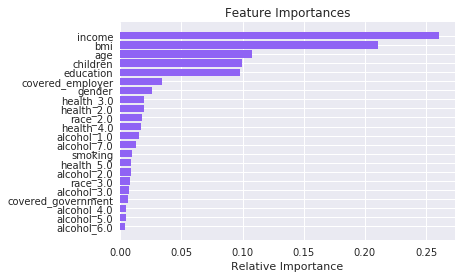

In [90]:
features = X.columns.values
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='#8f63f4', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

The feature importances plot shows which column play an important role in the random random forest. From this plot we can
conclude that, according to our rf model, log_income, bmi and age play an important role in determining the out of pocket 
expenditures for a person. With these feature importances, it might be good to get more insights in the important features.
After intepreting the results of feature importance, it could be useful to remove features that are not important for predicting the model. In this case, we do not have so many features and therefore we do not apply this. 

**Predicting**

In [91]:
row = X_Train.values[None,0]; row

array([[7.4000e+01, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.4000e+01,
        4.9468e+04, 8.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 2.9400e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00]])

In [93]:
rf.predict([82,1,1,0,10,25000,4,1,0,0,0,24,0,0,1,0,0,0,0,1,1,0])

array([1618.99])

In [94]:
rf.predict([82,1,1,0,10,25000,4,1,0,0,0,32,0,0,1,0,0,0,0,1,0,0])

array([2525.95])

***

<a id='Discussion'></a>

## Discussion

This study has several limitations. 

_Low prediction scores_


Text


_Limited features_
    
The models that are constructed might be biased toward features that are known to us. The set of features we used in this assignment was also influenced by the availibity of data in the HRS. So there might be relationships that our database is not aware of. For example, we include socio-dempgraphic and medical features into the models, whereas employment history might be relevant as well. 

Furthermore, we only used data from 2014. An analysis over time would be interesting as well. Panel data including medical, employment, and family history could improve predictions. 


_Limited models_

Given the models’ high MSE and the low R2, it appears that the causation of out of pocket medical expenditures is more complex than our models capture. There are more algorithms than we could investigate, and other machine learning approaches should be explored as tools for studying determinants of ut of pocket medical expenditures. In particular, while we consider parametric and nonparametric models, we do not consider semiparametric models which may offer flexibility beyond parametric models like LASSO without the challenges of interpretation faced by random forests. 


_Complicated sector_

The health care sector, especially in the United States, is constantly evolving and there are a lot of factors at play. There have been a lot of reforms over the years and the design of the health insurance system is very complex. This of course could change the outcome of our models. 


_External validity_

The prediction models that we created may not generalize to other countries because the United States has a unique institutional background, health care system, and culture. Nevertheless, we expect that our approach of constructing the models should be generalizable. It just would have to be applied to other data, and possibly other features should go into the models.


_Education_

Few years of education


Of course, future research can address some of these limitations. Additional data can be collected to evaluate predictive performance, and other models could be explored. Futhermore, the analysis could be expanded to other demographic groups, countries, and insurances. 

***

<a id='Conclusion'></a>

## Conclusion

This assignment predicts out of pocket medical expenditures of elderly between the age of 73 and 83 years old in the United States. More specifically, the effect of age, gender, race, education, income, number of children, self-reported health, BMI, alcohol, smoking, coverage by the government, and government by a former employer are explored. We made predictions by applying a multivariate linear regression, lasso regression, and random forest model  to data from the US Health and Retirement Study.

We find that our three machine learning approaches do not typically perform better than simpler models for prediction.

**Comparison of the models**

The optimization problem we try to solve is to minimize the errors between the predictions and the ground truth. The most basic metric for evaluating trained machine learning models is the MSE. MSE stands for mean squared error and is given by the average of the squares of the errors. In other words, the MSE is the difference between the predicted value and the real value so we would like to minimize it when training models:

$MSE = \displaystyle\frac{\sum (Y_i-Y_i)^2}{n}$

where n is the number of data-points.

We implemented multivariate linear regression with an accuracy of 4%.

We implemented Random Forest with an accuracy of XX%.

**Policy implications**

Understanding the likely success of policies will depend, in part, on being able to identify the most important features. Let us therefore translate the findings from this research into practice.

The predictive models provide some guidance on the preventive factors needed to inform interventions. First, governments have to significantly increase public spending on health. Coverage by the government can substantially decrease out of pocket medical expenditures. Futhermore, increasing health is key to reduction. Prevention! 

***

In [8]:
import os
os.system('jupyter nbconvert Finalversion.ipynb --to html --outputhtml')

256

<a href='#Back to top'>Back to top</a>